In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
xlm_df = pd.read_csv(Path('../../resources/prices/coin_Stellar.csv'), index_col='SNo')
xlm_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Stellar,XLM,2014-08-06 23:59:59,0.003402,0.002266,0.002373,0.002657,3.581980e+04,9.663695e+05
2,Stellar,XLM,2014-08-07 23:59:59,0.003042,0.002455,0.002686,0.002501,1.428640e+05,1.079148e+06
3,Stellar,XLM,2014-08-08 23:59:59,0.003243,0.002493,0.002493,0.002881,9.370780e+04,1.260109e+06
4,Stellar,XLM,2014-08-09 23:59:59,0.003710,0.002873,0.002884,0.003481,2.335790e+05,1.645185e+06
5,Stellar,XLM,2014-08-10 23:59:59,0.007620,0.003363,0.003497,0.004303,3.527370e+05,2.216012e+06
...,...,...,...,...,...,...,...,...,...
2394,Stellar,XLM,2021-02-23 23:59:59,0.466542,0.322049,0.466542,0.386530,2.962480e+09,8.689169e+09
2395,Stellar,XLM,2021-02-24 23:59:59,0.432824,0.370403,0.386795,0.407240,1.862050e+09,9.162057e+09
2396,Stellar,XLM,2021-02-25 23:59:59,0.425786,0.381269,0.407084,0.381269,1.320644e+09,8.577766e+09


In [3]:
xlm_df['Date'] = pd.to_datetime(xlm_df['Date']).dt.date
xlm_df['Date'] = pd.to_datetime(xlm_df['Date'])
xlm_df['Spread'] = xlm_df.High - xlm_df.Low
xlm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 1 to 2398
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2398 non-null   object        
 1   Symbol     2398 non-null   object        
 2   Date       2398 non-null   datetime64[ns]
 3   High       2398 non-null   float64       
 4   Low        2398 non-null   float64       
 5   Open       2398 non-null   float64       
 6   Close      2398 non-null   float64       
 7   Volume     2398 non-null   float64       
 8   Marketcap  2398 non-null   float64       
 9   Spread     2398 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 206.1+ KB


## Plot the closing value of Stellar over time

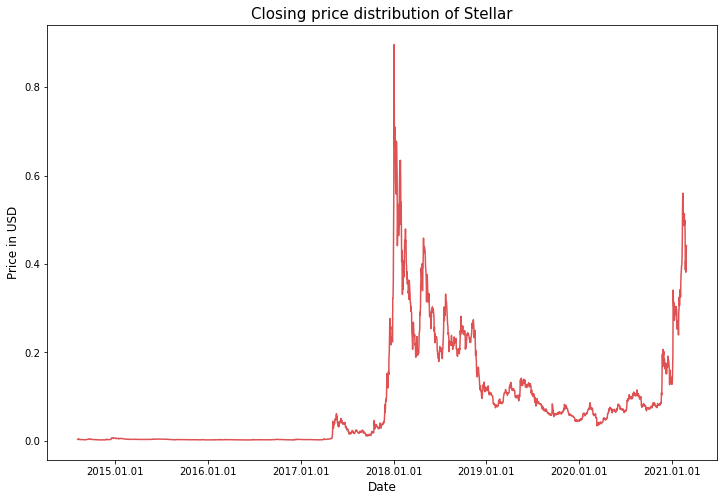

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = xlm_df.Close.values, x=xlm_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = xlm_df.Close.values, x=xlm_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Stellar", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

xlm_df['Date_mpl'] = xlm_df['Date'].apply(lambda x: mdates.date2num(x))

temp_xlm_df = xlm_df.copy(deep=False)
temp_xlm_df = temp_xlm_df.set_index(['Date'])
temp_xlm_df = temp_xlm_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_xlm_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2014-08-06,0.003402,0.002266,0.002373,0.002657,3.581980e+04,16288.0
2014-08-07,0.003042,0.002455,0.002686,0.002501,1.428640e+05,16289.0
2014-08-08,0.003243,0.002493,0.002493,0.002881,9.370780e+04,16290.0
2014-08-09,0.003710,0.002873,0.002884,0.003481,2.335790e+05,16291.0
2014-08-10,0.007620,0.003363,0.003497,0.004303,3.527370e+05,16292.0
...,...,...,...,...,...,...
2021-02-23,0.466542,0.322049,0.466542,0.386530,2.962480e+09,18681.0
2021-02-24,0.432824,0.370403,0.386795,0.407240,1.862050e+09,18682.0
2021-02-25,0.425786,0.381269,0.407084,0.381269,1.320644e+09,18683.0


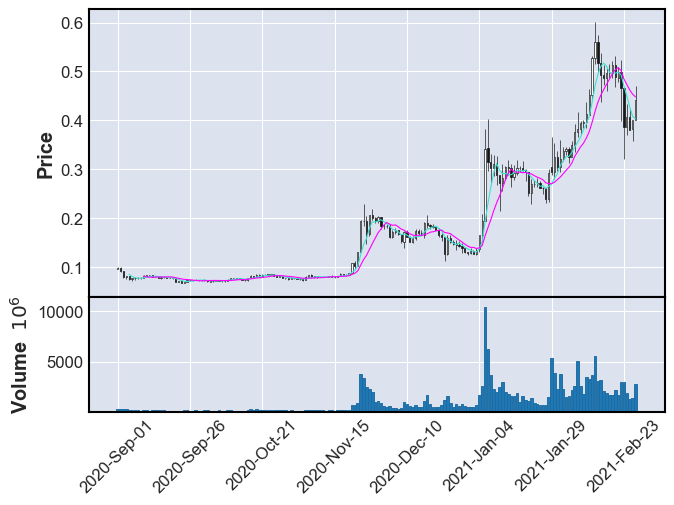

In [6]:
mpf.plot(temp_xlm_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_Stellar.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,0.515977,0.476988,0.557179
183,2021-03-03 23:59:59,0.526964,0.486093,0.565495
184,2021-03-04 23:59:59,0.529287,0.488504,0.568723
185,2021-03-05 23:59:59,0.538699,0.496418,0.581140
186,2021-03-06 23:59:59,0.547370,0.503777,0.588266


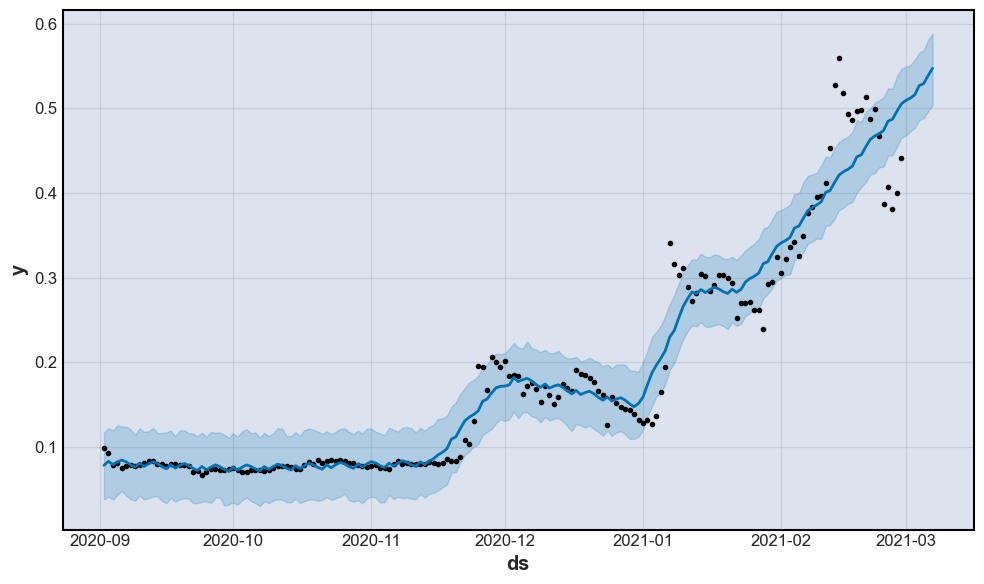

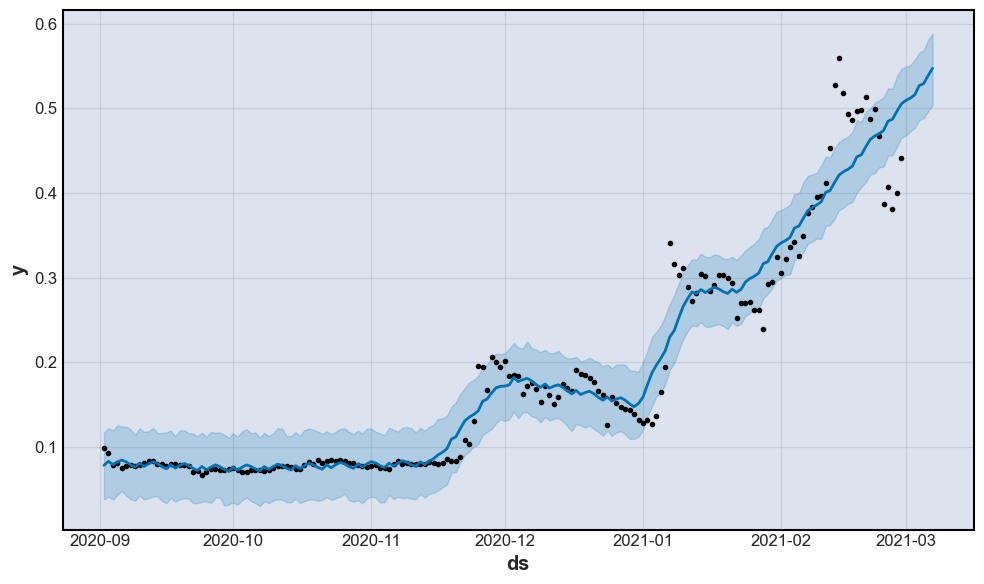

In [9]:
m.plot(forecast)

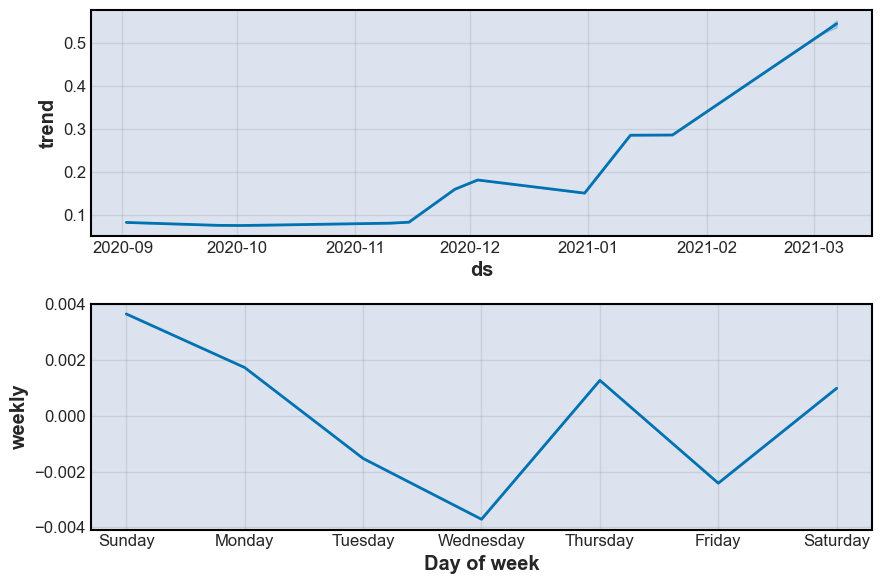

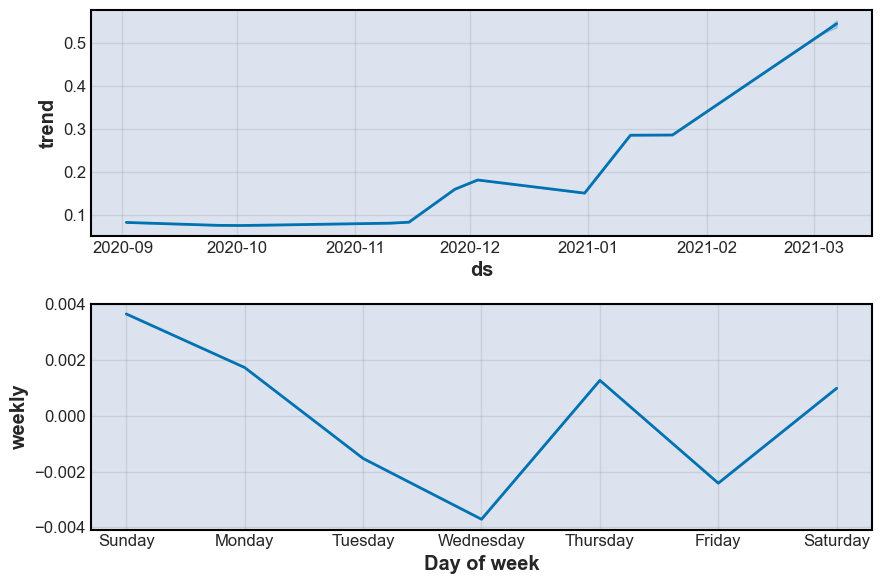

In [10]:
m.plot_components(forecast)